In [1]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import string

nltk.download('brown')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

stop_words = set(stopwords.words('russian'))
punctuation = set(string.punctuation)

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 1. Dataset overview

In [2]:
df = pd.read_csv('informal_formal.csv').drop('Unnamed: 0', axis=1)
df.head()

,informal,formal
0,"Спасибо :3\nНо, к сожалению, мы не застали тот...",Благодарю вас
1,поговорите со мной иначе я усну... ааааа я даж...,"Пожалуйста, поговорите со мной иначе я усну......"
2,"ОБоже, невыносимо голова болит. Не высыпаюсь у...","Боже, невыносимо голова болит. Я не высыпаюсь ..."
3,у меня не получилось через activator сделать T...,"К сожалению, у меня не получилось через activa..."
4,Новый дизайн твиттера... Не очень если честно :(,"Новый дизайн твиттера… Не очень, если честно"


In [3]:
sep_len = 30
print(f'Dataframe shape: {df.shape}')
print('_'*sep_len)
print(f'Number of empty cells:')
print(df.isnull().sum())
print('_'*sep_len)
print(f'Number of duplicated rows: {df.duplicated().sum()}')

df.dropna(subset=['informal', 'formal'], inplace=True)

Dataframe shape: (35700, 2)
______________________________
Number of empty cells:
informal    0
formal      1
dtype: int64
______________________________
Number of duplicated rows: 480


# 2. Length analysis (average number of tokens)

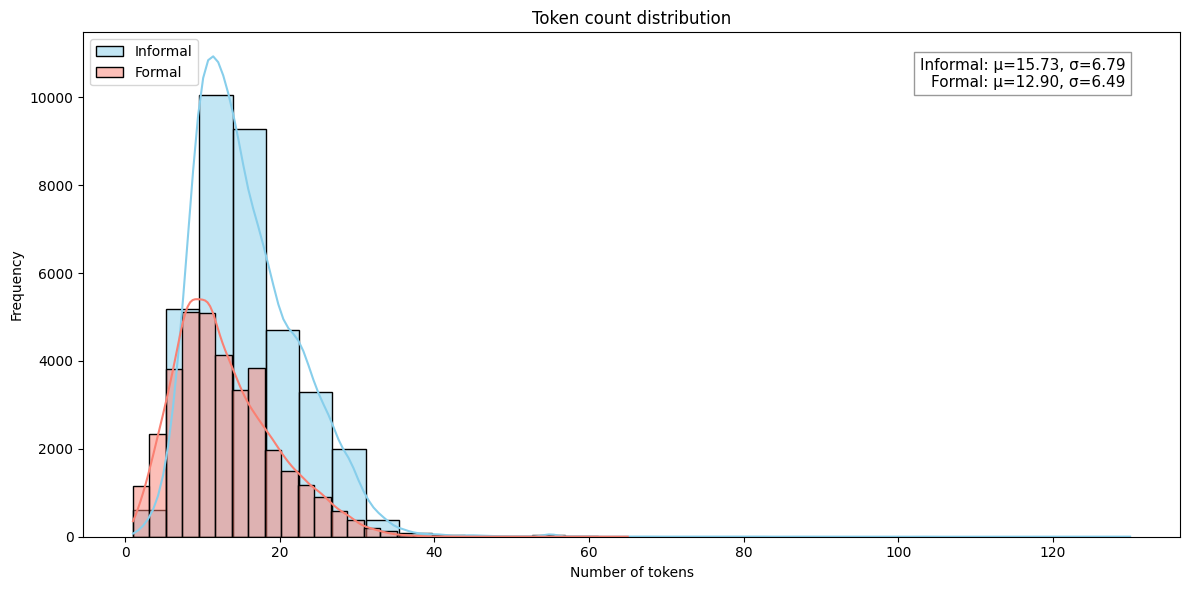

In [4]:
def clean_tokens(text):
    tokens = word_tokenize(str(text).lower())
    return [t for t in tokens if t.isalpha() and t not in stop_words]


df['informal_len'] = df['informal'].apply(lambda x: len(word_tokenize(str(x))))
df['formal_len'] = df['formal'].apply(lambda x: len(word_tokenize(str(x))))
df['len_diff'] = df['formal_len'] - df['informal_len']

informal_mean = df['informal_len'].mean()
informal_std = df['informal_len'].std()
formal_mean = df['formal_len'].mean()
formal_std = df['formal_len'].std()


plt.figure(figsize=(12, 6))
sns.histplot(df['informal_len'], kde=True, color='skyblue', label='Informal', bins=30)
sns.histplot(df['formal_len'], kde=True, color='salmon', label='Formal', bins=30)


stats_text = (
    f"Informal: μ={informal_mean:.2f}, σ={informal_std:.2f}\n"
    f"Formal: μ={formal_mean:.2f}, σ={formal_std:.2f}"
)
plt.text(
    0.95, 0.95, stats_text,
    ha='right', va='top',
    transform=plt.gca().transAxes,
    fontsize=11, bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray')
)

plt.title("Token count distribution")
plt.xlabel("Number of tokens")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()






### Plotbox visualization

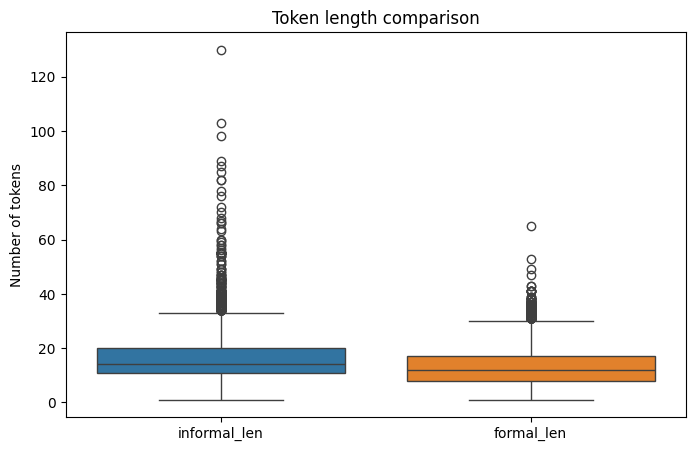

In [5]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[['informal_len', 'formal_len']])
plt.title("Token length comparison")
plt.ylabel("Number of tokens")
plt.show()

## Average number of charachters

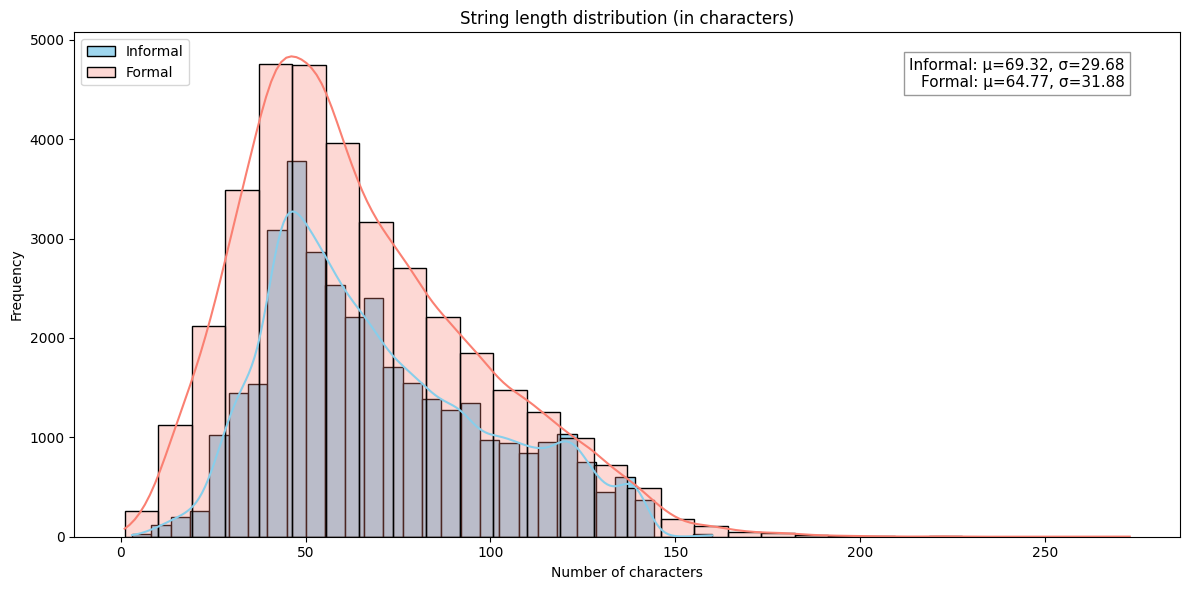

In [6]:
df['informal_len'] = df['informal'].astype(str).apply(len)
df['formal_len'] = df['formal'].astype(str).apply(len)


avg_informal_len = df['informal_len'].mean()
avg_formal_len = df['formal_len'].mean()

informal_std = df['informal_len'].std()
formal_std = df['formal_len'].std()



plt.figure(figsize=(12, 6))
sns.histplot(df['informal_len'], kde=True, color='skyblue', label='Informal', bins=30, alpha=0.8)
sns.histplot(df['formal_len'], kde=True, color='salmon', label='Formal', bins=30, alpha=0.3)

stats_text = (
    f"Informal: μ={avg_informal_len:.2f}, σ={informal_std:.2f}\n"
    f"Formal: μ={avg_formal_len:.2f}, σ={formal_std:.2f}"
)
plt.text(
    0.95, 0.95, stats_text,
    ha='right', va='top',
    transform=plt.gca().transAxes,
    fontsize=11, bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray')
)

plt.title("String length distribution (in characters)")
plt.xlabel("Number of characters")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

### Plotbox visualization

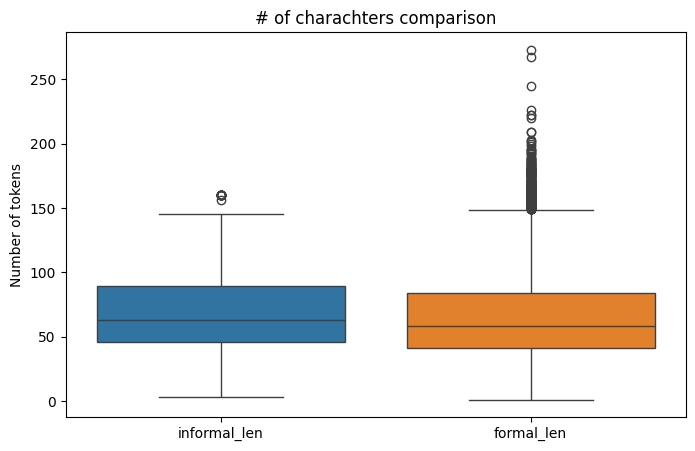

In [7]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[['informal_len', 'formal_len']])
plt.title("# of charachters comparison")
plt.ylabel("Number of tokens")
plt.show()

# 3. Top words (without stopwords and punctuation)

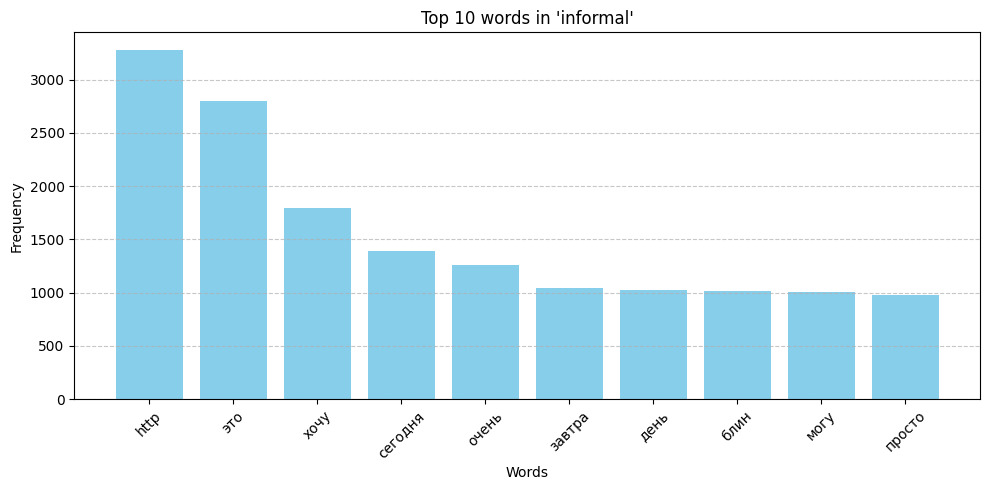

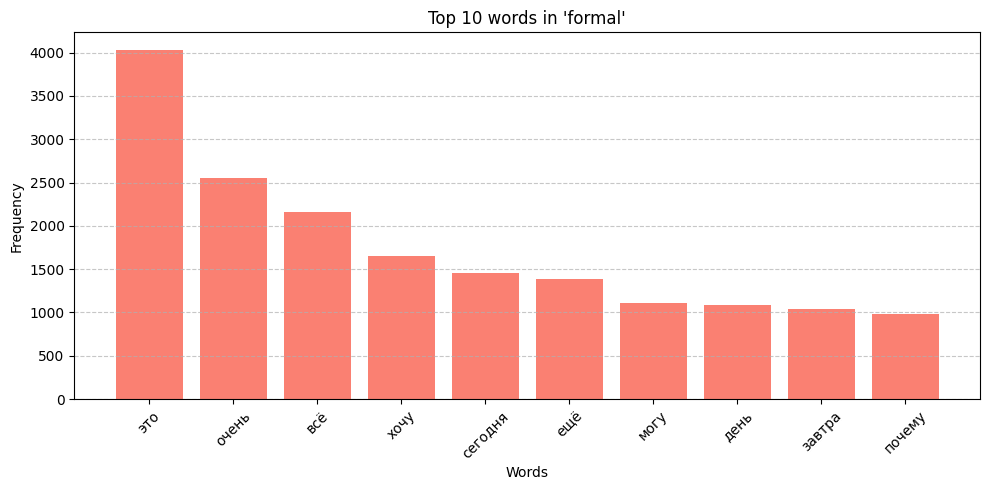

In [8]:
informal_tokens = clean_tokens(' '.join(df['informal'].astype(str)))
formal_tokens = clean_tokens(' '.join(df['formal'].astype(str)))

informal_freq = Counter(informal_tokens).most_common(10)
formal_freq = Counter(formal_tokens).most_common(10)

def plot_top_words(freq_data, title, color):
    words, counts = zip(*freq_data)
    plt.figure(figsize=(10, 5))
    plt.bar(words, counts, color=color)
    plt.title(title)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_top_words(informal_freq, "Top 10 words in 'informal'", 'skyblue')
plot_top_words(formal_freq, "Top 10 words in 'formal'", 'salmon')

# 4. Most filtered words (in informal but not in formal)


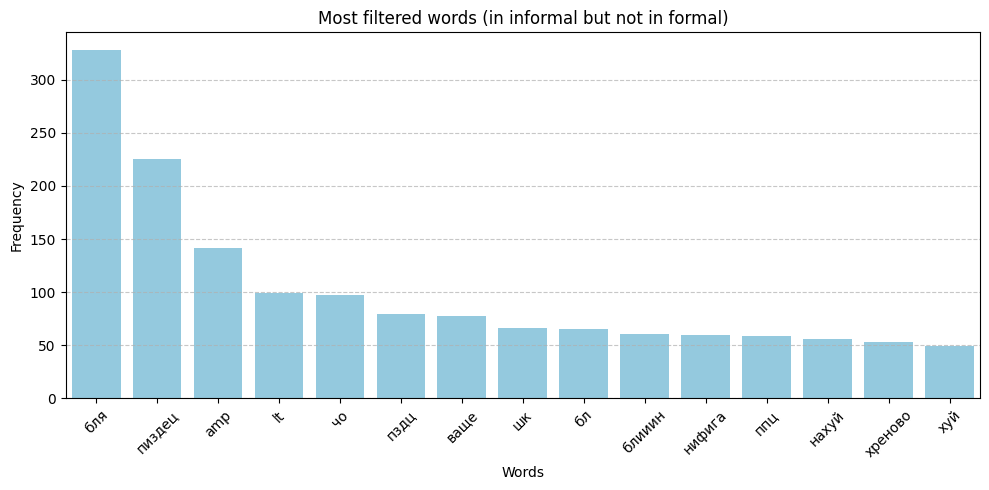

In [9]:

informal_tokens_all = clean_tokens(' '.join(df['informal'].astype(str)))
formal_tokens_all = clean_tokens(' '.join(df['formal'].astype(str)))

informal_unique = set(informal_tokens_all)
formal_unique = set(formal_tokens_all)

filtered_words = [word for word in informal_tokens_all if word not in formal_unique]

filtered_freq = Counter(filtered_words).most_common(15)

words, counts = zip(*filtered_freq)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(words), y=list(counts), color='skyblue')

plt.title("Most filtered words (in informal but not in formal)")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()





# 5. Token overlap (how much informal content appears in formal)

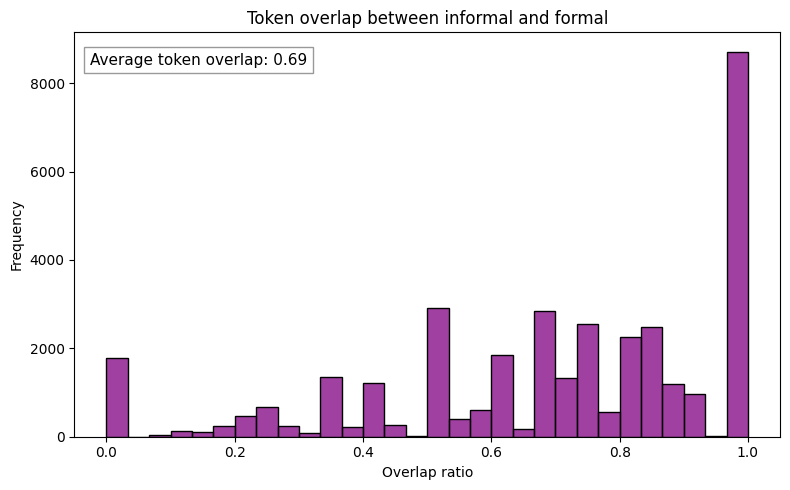

In [10]:
def token_overlap(row):
    informal_set = set(clean_tokens(row['informal']))
    formal_set = set(clean_tokens(row['formal']))
    if informal_set:
        return len(informal_set & formal_set) / len(informal_set)
    return 0

df['token_overlap'] = df.apply(token_overlap, axis=1)

avg_overlap = df['token_overlap'].mean()

plt.figure(figsize=(8, 5))
sns.histplot(df['token_overlap'], bins=30, color='purple')

stats_text = f"Average token overlap: {avg_overlap:.2f}"
plt.text(
    0.33, 0.95, stats_text,
    ha='right', va='top',
    transform=plt.gca().transAxes,
    fontsize=11, bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray')
)


plt.title("Token overlap between informal and formal")
plt.xlabel("Overlap ratio")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

